# Exploratory Data Analysis (EDA)

This notebook explores the preprocessed dataset to develop a deeper understanding of the data prior to modeling.

## Setting Up Spark Environment

In [1]:
import os

# Set Java and Spark paths
os.environ["JAVA_HOME"] = "/opt/homebrew/opt/openjdk@17"
os.environ["SPARK_HOME"] = "/opt/homebrew/Cellar/apache-spark/4.0.0/libexec"

from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder \
    .appName("PreprocessingNotebook") \
    .getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/08/04 23:35:52 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/08/04 23:35:52 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


## Loading in Data

In [5]:
#Loading in data from CSV files saved in Data folder
customer_data_fe = spark.read.csv("../Data/preprocessed_segmenting_data_csv", header=True, inferSchema=True)

In [6]:
#Ensure data was loaded in correctly
customer_data_fe.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Year_Birth: integer (nullable = true)
 |-- Education: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Kidhome: integer (nullable = true)
 |-- Teenhome: integer (nullable = true)
 |-- Dt_Customer: string (nullable = true)
 |-- Recency: integer (nullable = true)
 |-- MntWines: integer (nullable = true)
 |-- MntFruits: integer (nullable = true)
 |-- MntMeatProducts: integer (nullable = true)
 |-- MntFishProducts: integer (nullable = true)
 |-- MntSweetProducts: integer (nullable = true)
 |-- MntGoldProds: integer (nullable = true)
 |-- NumDealsPurchases: integer (nullable = true)
 |-- NumWebPurchases: integer (nullable = true)
 |-- NumCatalogPurchases: integer (nullable = true)
 |-- NumStorePurchases: integer (nullable = true)
 |-- NumWebVisitsMonth: integer (nullable = true)
 |-- AcceptedCmp3: integer (nullable = true)
 |-- AcceptedCmp4: integer (nullable = true)
 |-- AcceptedC

In [7]:
customer_data_fe.show()

+----+----------+-----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+------------+------------+------------+------------+--------+--------------+--------------------+-------------------+------------------------+---+-----------+---------+
|  ID|Year_Birth|  Education|Marital_Status|Income|Kidhome|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|AcceptedCmp2|Complain|total_num_kids|Dt_Customer_datetime|total_days_enlisted|total_campaigns_accepted|age|total_spent|age_group|
+----+----------+-----------+--------------+------+-------+--------+-----------+-------+--------+---------+-----------

## Verifying Feature Engineered Columns with Queries

First, I will verify that the feature-engineered columns were created correctly by examining the data through targeted queries.

In [8]:
customer_data_fe.select('Kidhome', 'Teenhome', 'total_num_kids').show()

+-------+--------+--------------+
|Kidhome|Teenhome|total_num_kids|
+-------+--------+--------------+
|      0|       0|             0|
|      1|       1|             2|
|      0|       0|             0|
|      1|       0|             1|
|      1|       0|             1|
|      0|       1|             1|
|      0|       1|             1|
|      1|       0|             1|
|      1|       0|             1|
|      1|       1|             2|
|      0|       0|             0|
|      0|       0|             0|
|      1|       1|             2|
|      0|       0|             0|
|      0|       0|             0|
|      1|       1|             2|
|      0|       0|             0|
|      0|       1|             1|
|      1|       0|             1|
|      0|       0|             0|
+-------+--------+--------------+
only showing top 20 rows


In [9]:
customer_data_fe.select('Dt_Customer_datetime').show()

+--------------------+
|Dt_Customer_datetime|
+--------------------+
|          2012-09-04|
|          2014-03-08|
|          2013-08-21|
|          2014-02-10|
|          2014-01-19|
|          2013-09-09|
|          2012-11-13|
|          2013-05-08|
|          2013-06-06|
|          2014-03-13|
|          2012-11-13|
|          2013-11-15|
|          2013-11-15|
|          2012-10-10|
|          2012-11-24|
|          2012-12-24|
|          2012-08-31|
|          2013-03-28|
|          2012-11-03|
|          2012-08-08|
+--------------------+
only showing top 20 rows


In [10]:
customer_data_fe.select('total_days_enlisted').show()

+-------------------+
|total_days_enlisted|
+-------------------+
|                663|
|                113|
|                312|
|                139|
|                161|
|                293|
|                593|
|                417|
|                388|
|                108|
|                593|
|                226|
|                226|
|                627|
|                582|
|                552|
|                667|
|                458|
|                603|
|                690|
+-------------------+
only showing top 20 rows


In [11]:
customer_data_fe.select('AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'total_campaigns_accepted').show()

+------------+------------+------------+------------+------------+------------------------+
|AcceptedCmp1|AcceptedCmp2|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|total_campaigns_accepted|
+------------+------------+------------+------------+------------+------------------------+
|           0|           0|           0|           0|           0|                       0|
|           0|           0|           0|           0|           0|                       0|
|           0|           0|           0|           0|           0|                       0|
|           0|           0|           0|           0|           0|                       0|
|           0|           0|           0|           0|           0|                       0|
|           0|           0|           0|           0|           0|                       0|
|           0|           0|           0|           0|           0|                       0|
|           0|           0|           0|           0|           0|              

In [12]:
customer_data_fe.select('Year_Birth', 'age').show()

+----------+---+
|Year_Birth|age|
+----------+---+
|      1957| 57|
|      1954| 60|
|      1965| 49|
|      1984| 30|
|      1981| 33|
|      1967| 47|
|      1971| 43|
|      1985| 29|
|      1974| 40|
|      1950| 64|
|      1976| 38|
|      1959| 55|
|      1952| 62|
|      1987| 27|
|      1946| 68|
|      1980| 34|
|      1946| 68|
|      1949| 65|
|      1985| 29|
|      1982| 32|
+----------+---+
only showing top 20 rows


## Analyzing Categorical Variables Before One-Hot Encoding

Before applying one-hot encoding to the categorical variables, I will examine their contents to better understand their structure and distribution.

In [13]:
customer_data_fe.groupBy("Marital_Status").count().orderBy("count", ascending=False).show()

+--------------+-----+
|Marital_Status|count|
+--------------+-----+
|       Married|  857|
|      Together|  573|
|        Single|  474|
|      Divorced|  232|
|         Widow|   76|
+--------------+-----+



In [14]:
# Show count of each category in Education
customer_data_fe.groupBy("Education").count().orderBy("count", ascending=False).show()

+-----------+-----+
|  Education|count|
+-----------+-----+
|  Bachelors| 1115|
|        PhD|  479|
|     Master|  364|
|   2n Cycle|  200|
|High School|   54|
+-----------+-----+



## Data Visualization

After completing data cleaning and feature engineering, I created visualizations to gain a deeper understanding of the dataset and to explore potential relationships and patterns among the variables.

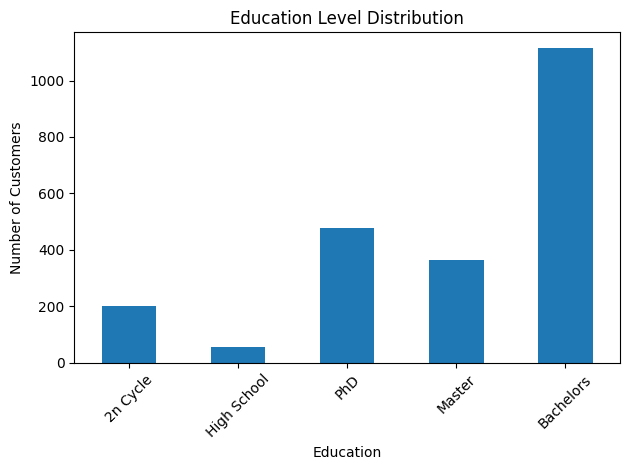

In [15]:
# Convert to pandas
edu_counts = customer_data_fe.groupBy("Education").count().toPandas()

# Plot
import matplotlib.pyplot as plt
edu_counts.plot(kind="bar", x="Education", y="count", legend=False)
plt.title("Education Level Distribution")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


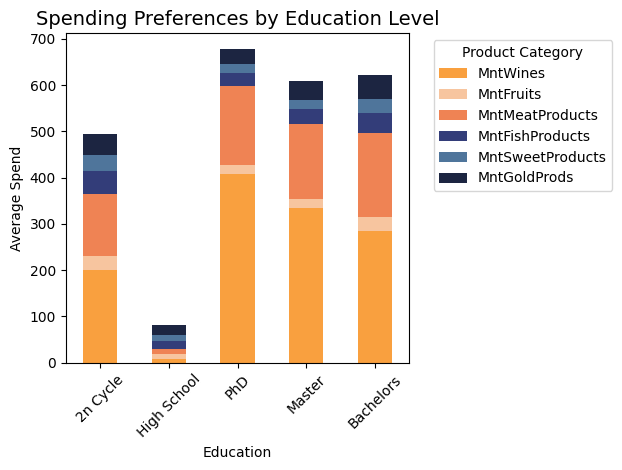

In [19]:
from pyspark.sql import functions as F

# Calculate average spend in each product category by education level

cols = ["MntWines", "MntFruits", "MntMeatProducts",
        "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

# Group by education and calculate average spend in each category
avg_spend_edu = customer_data_fe.groupBy("Education") \
    .agg(*[F.avg(c).alias(c) for c in cols]) \
    .toPandas().set_index("Education")

# Poster-themed color palette (orange/navy vibe)
colors = ['#F9A03F', '#F7C59F', '#EF8354', '#333D79', '#4F759B', '#1C2541']

# Plot stacked bar chart
avg_spend_edu.plot(kind="bar", stacked=True, color=colors)

# Styling
plt.title("Spending Preferences by Education Level", fontsize=14)
plt.ylabel("Average Spend")
plt.xticks(rotation=45)
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

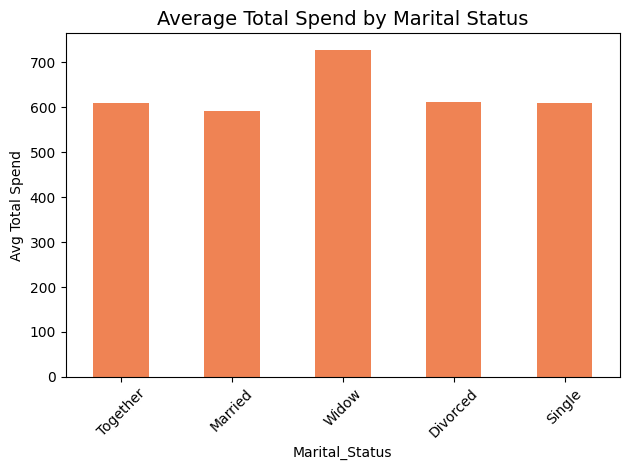

In [20]:
#Group and plot
spend_marital = customer_data_fe.groupBy("Marital_Status").agg(F.avg("total_spent").alias("Avg_Spend")).toPandas()

#Same theme
bar_color = '#EF8354'  # Matches previous palette, bold orange

spend_marital.plot(kind="bar", x="Marital_Status", y="Avg_Spend", legend=False, color=bar_color)

# Styling
plt.title("Average Total Spend by Marital Status", fontsize=14)
plt.ylabel("Avg Total Spend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


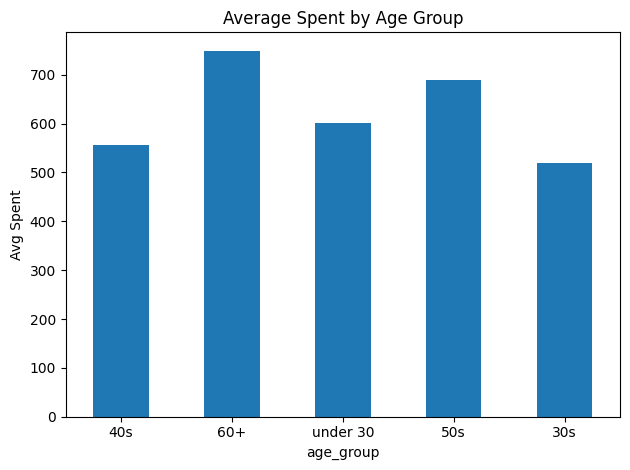

In [21]:
# Group by age_group and calculate average total_spent
spend_age = customer_data_fe.groupBy("age_group") \
    .agg(F.avg("total_spent").alias("avg_spent")).toPandas()

# Plot bar chart
spend_age.plot(kind="bar", x="age_group", y="avg_spent", legend=False)
plt.title("Average Spent by Age Group")
plt.ylabel("Avg Spent")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

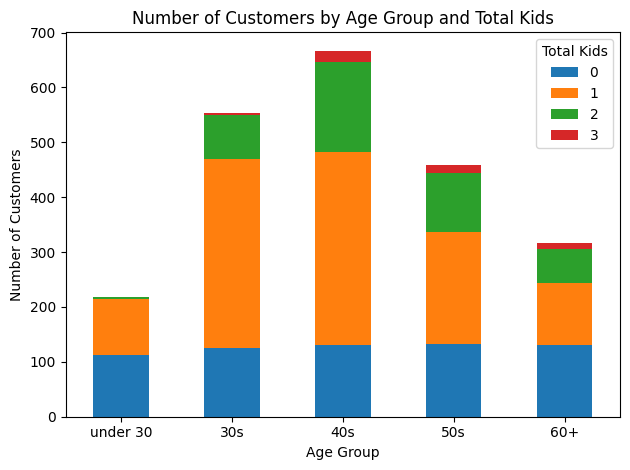

In [23]:
import pandas as pd

# Group by age_group and total_num_kids, then count
kids_dist = customer_data_fe.groupBy("age_group", "total_num_kids") \
    .count().toPandas()

# Sort age groups manually
order = ["under 30", "30s", "40s", "50s", "60+"]
kids_dist["age_group"] = pd.Categorical(kids_dist["age_group"], categories=order, ordered=True)
kids_dist = kids_dist.sort_values(["age_group", "total_num_kids"])

# Pivot for stacked bar chart
pivot = kids_dist.pivot(index="age_group", columns="total_num_kids", values="count").fillna(0)

# Plot
pivot.plot(kind="bar", stacked=True)
plt.title("Number of Customers by Age Group and Total Kids")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Total Kids")
plt.tight_layout()

/var/folders/rn/j5gdm68j64lf2qskrbjcfsxm0000gn/T/ipykernel_50929/3990262145.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spend_by_bin = enlist_spend.groupby("days_bin")["total_spent"].mean().reset_index()
/var/folders/rn/j5gdm68j64lf2qskrbjcfsxm0000gn/T/ipykernel_50929/3990262145.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_spend_by_bin, x="days_bin", y="total_spent", palette="Blues_d")


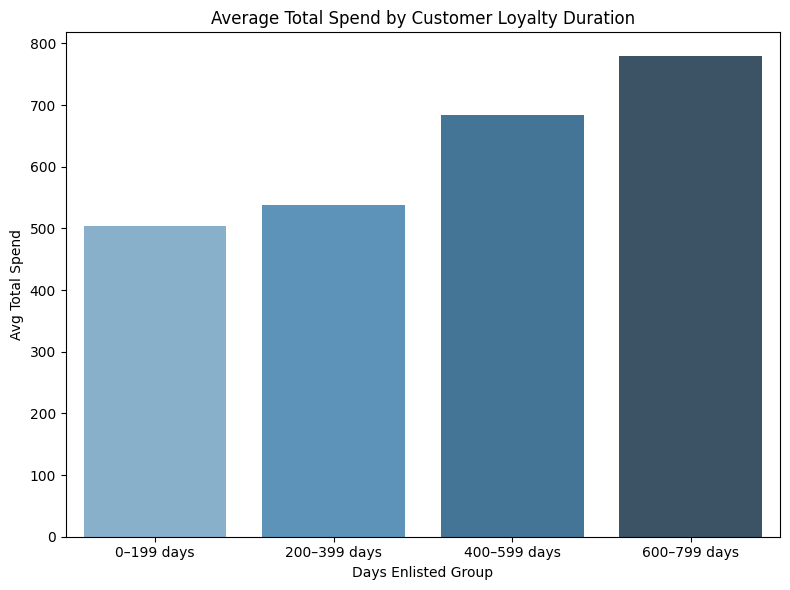

In [24]:
# Plot bar chart
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to pandas
enlist_spend = customer_data_fe.select("total_days_enlisted", "total_spent").toPandas()

# Define bin edges and matching labels (1 fewer label than number of edges)
bins = [0, 200, 400, 600, 800]
labels = ["0–199 days", "200–399 days", "400–599 days", "600–799 days"]

# Apply binning
enlist_spend["days_bin"] = pd.cut(enlist_spend["total_days_enlisted"], bins=bins, labels=labels, right=False)

# Group by bin and calculate average spend
avg_spend_by_bin = enlist_spend.groupby("days_bin")["total_spent"].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_spend_by_bin, x="days_bin", y="total_spent", palette="Blues_d")
plt.title("Average Total Spend by Customer Loyalty Duration")
plt.xlabel("Days Enlisted Group")
plt.ylabel("Avg Total Spend")
plt.tight_layout()
plt.show()

## Exploratory Data Analysis Insights

- **Education Level Distribution**  
  - Most customers hold a **Bachelor’s degree**, followed by those with a **PhD** or **Master’s**.  
  - **High School** education is the least represented among customers.

- **Spending Preferences by Education Level**  
  - Customers with **PhDs** and **Master’s degrees** demonstrate the highest overall spending, particularly on **wine** and **meat products**.  
  - Customers with only a **High School** education show significantly lower average spending across all product categories.

- **Average Total Spend by Marital Status**  
  - **Widowed customers** have the highest average total spending.  
  - **Married** individuals tend to spend the least, while **Together**, **Single**, and **Divorced** customers cluster around the overall average.

- **Average Spend by Age Group**  
  - Spending increases with age, peaking in the **60+** group.  
  - Customers in their **30s** show the lowest average spending.

- **Number of Customers by Age Group and Total Kids**  
  - The largest customer segments are in their **30s** and **40s**.  
  - Most customers in these age groups have **one or two children**.

- **Average Total Spend by Customer Loyalty Duration**  
  - A clear positive trend is observed: **longer customer loyalty** is associated with **higher spending**.  
  - Customers enlisted for **600–799 days** spend the most on average, while those in the **0–199 day** range spend the least.